In [41]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Explore Data

## News

In [2]:
column_names = ['News_id', 'Category', 'Subcategory', 'Title', 'Abstract', 'URL', 'Title_Entities', 'Abstract_Entities']
news = pd.read_csv('../data/train_news.tsv', sep='\t', names=column_names)
# news = pd.read_csv('../data/train_news_processed.csv')
news.head()

,News_id,Category,Subcategory,Title,Abstract,URL,Title_Entities,Abstract_Entities
0,N621266,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N318047,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N162003,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N603780,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N652304,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [3]:
# news.to_csv('../data/train_news_processed.csv', index=False)

### Info

In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   News_id            101527 non-null  object
 1   Category           101527 non-null  object
 2   Subcategory        101527 non-null  object
 3   Title              101527 non-null  object
 4   Abstract           96112 non-null   object
 5   URL                101527 non-null  object
 6   Title_Entities     101524 non-null  object
 7   Abstract_Entities  101521 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


### Duplicate

In [6]:
news[news.duplicated()].shape[0]

0

In [9]:
news[news.duplicated(subset='Title')].shape[0]

3139

In [8]:
news[news.duplicated(subset=['Title', 'Abstract'])].shape[0]

2292

In [13]:
news = news.drop_duplicates(subset='Title')

### Missing

In [14]:
news.isna().sum()

News_id                 0
Category                0
Subcategory             0
Title                   0
Abstract             5343
URL                     0
Title_Entities          3
Abstract_Entities       6
dtype: int64

### Category

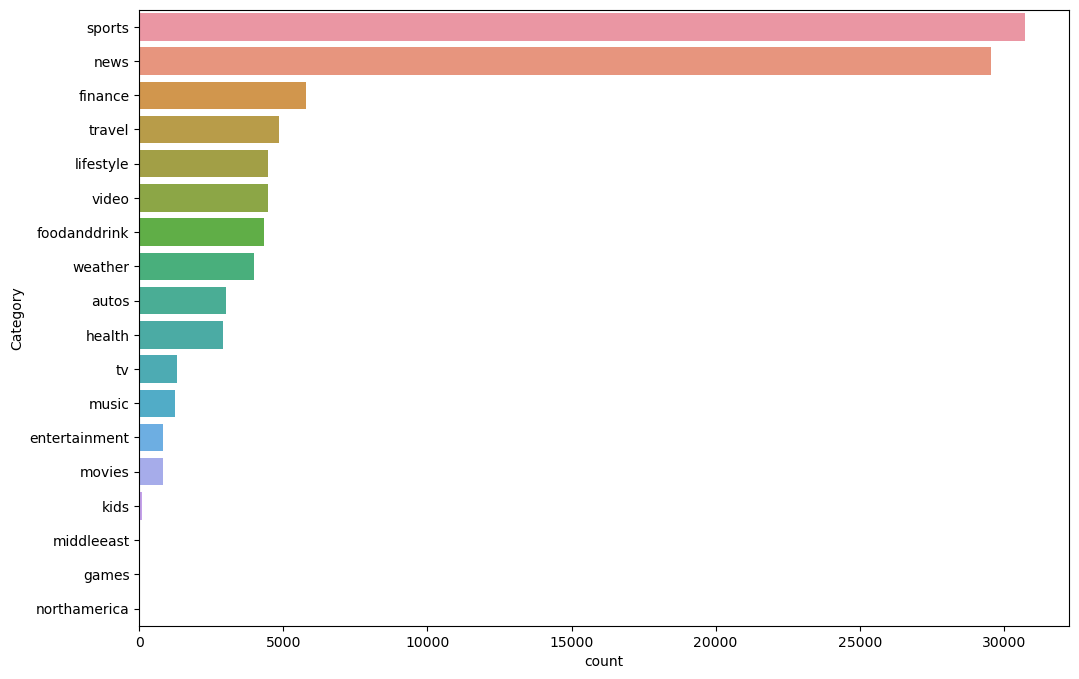

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data=news, y='Category', order=news['Category'].value_counts().index)
plt.show()

### Subcategory

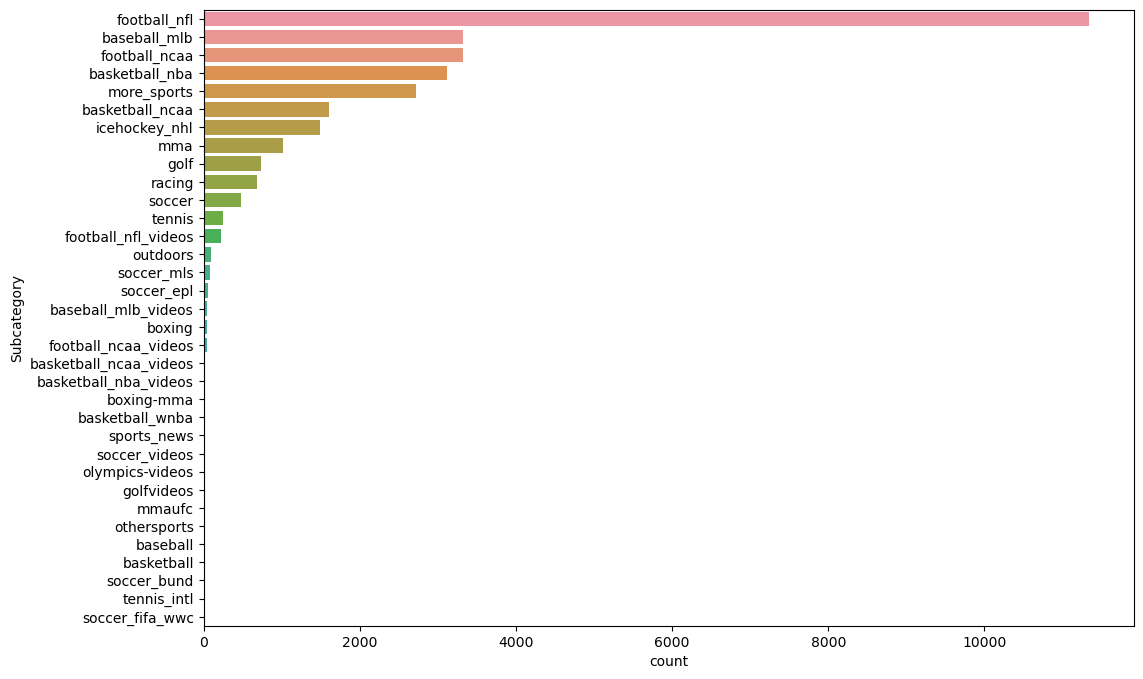

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(data=news[news['Category']=='sports'], y='Subcategory', order=news[news['Category']=='sports']['Subcategory'].value_counts().index)
plt.show()

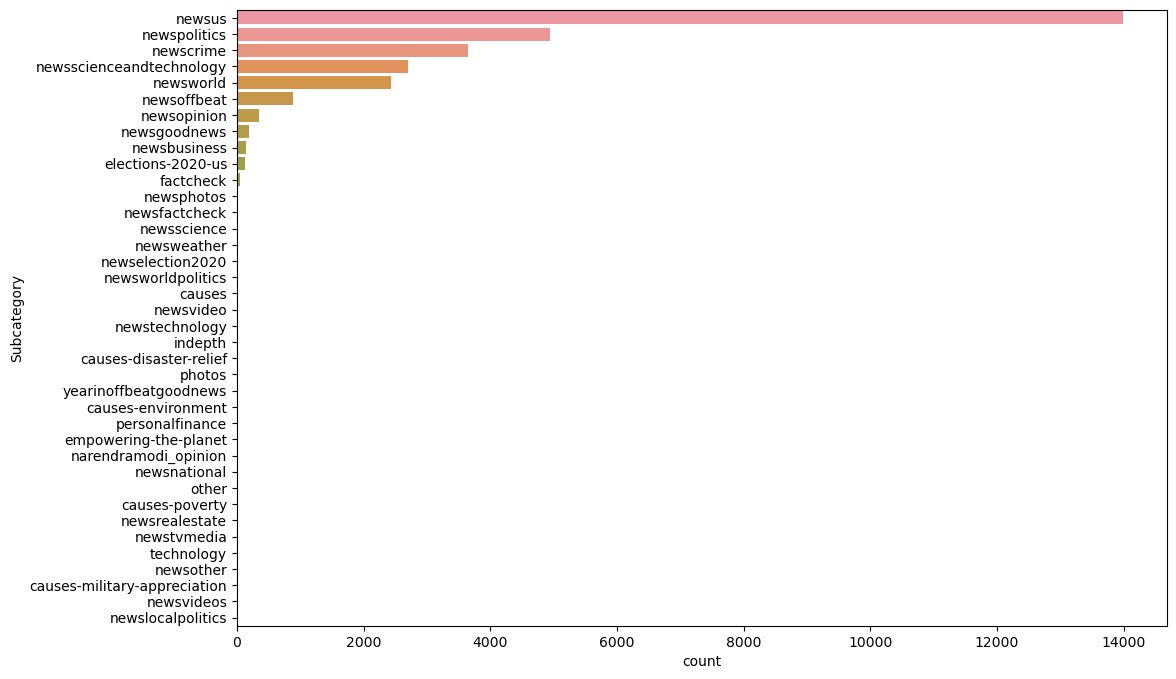

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(data=news[news['Category']=='news'], y='Subcategory', order=news[news['Category']=='news']['Subcategory'].value_counts().index)
plt.show()

### Title

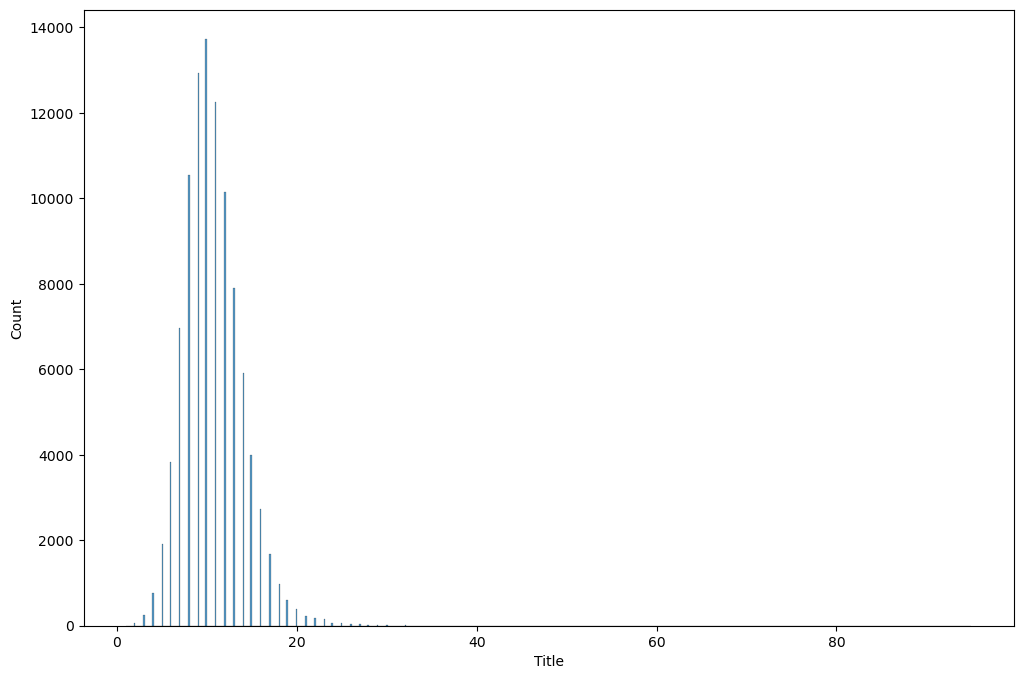

In [18]:
plt.figure(figsize=(12, 8))
sns.histplot(x=news['Title'].apply(lambda x: len(x.split())))
plt.show()

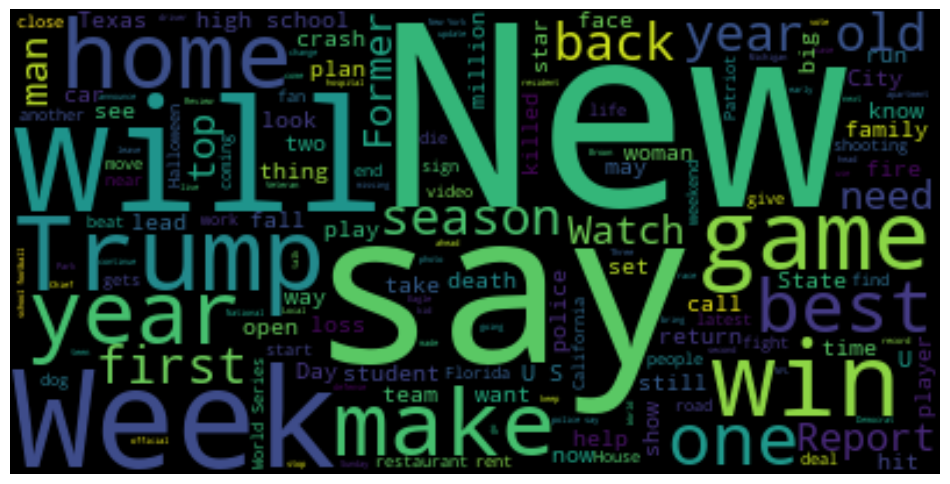

In [19]:
text = ' '
for i in news['Title']:
    text += i + ' '

wordcloud = WordCloud().generate(text=text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

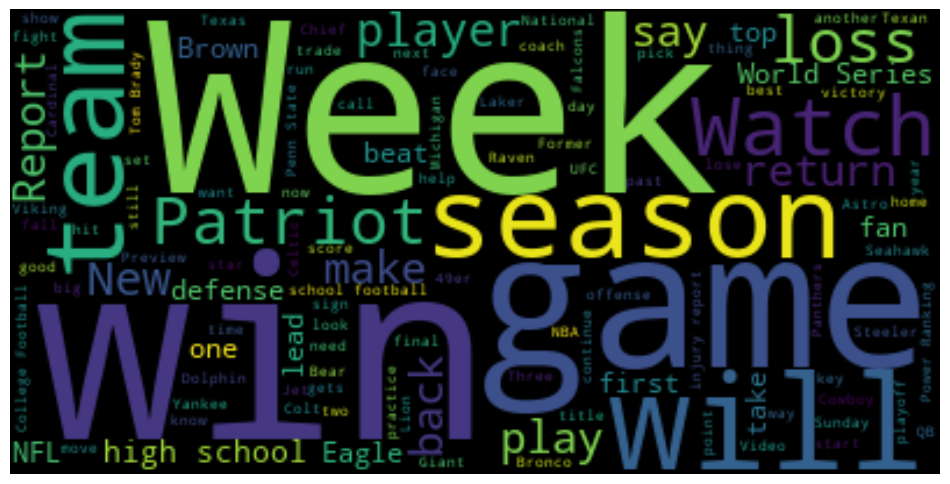

In [20]:
text = ' '
for i in news[news['Category']=='sports']['Title']:
    text += i + ' '

wordcloud = WordCloud().generate(text=text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

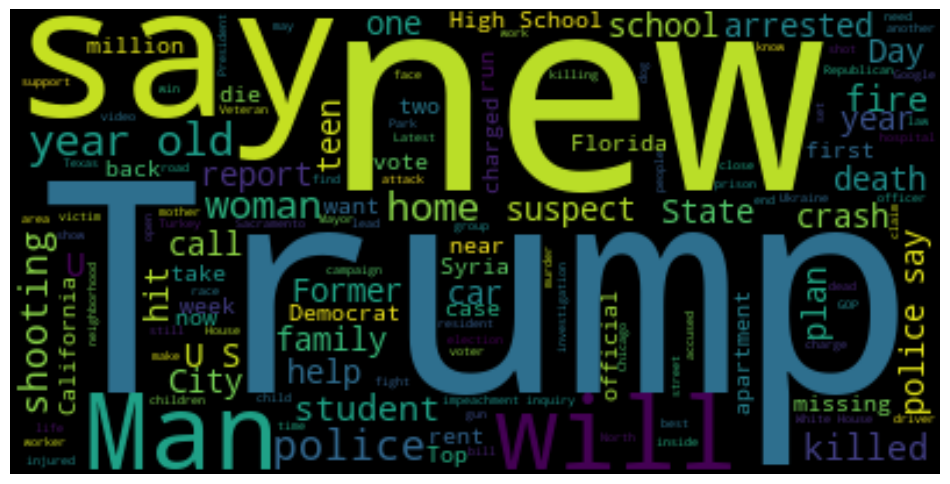

In [21]:
text = ' '
for i in news[news['Category']=='news']['Title']:
    text += i + ' '

wordcloud = WordCloud().generate(text=text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Encode Title

In [50]:
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(news['Title'].fillna(' ').values).get_shape())
vectorizer = TfidfVectorizer()
print(vectorizer.fit_transform(news['Title'].fillna(' ').values).get_shape())
vectorizer = HashingVectorizer()
print(vectorizer.fit_transform(news['Title'].fillna(' ').values).get_shape())

(98388, 40990)
(98388, 40990)
(98388, 1048576)


### Encode Abstract

In [49]:
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(news['Abstract'].fillna(' ').values).get_shape())
vectorizer = TfidfVectorizer()
print(vectorizer.fit_transform(news['Abstract'].fillna(' ').values).get_shape())
vectorizer = HashingVectorizer()
print(vectorizer.fit_transform(news['Abstract'].fillna(' ').values).get_shape())

(98388, 68994)
(98388, 68994)
(98388, 1048576)


## Behaviors

In [8]:
# column_names = ['Impression_id', 'User', 'Time', 'Clicked_News', 'Impressions']
# behaviors = pd.read_csv('./train_behaviors.tsv', sep='\t', names=column_names)
behaviors = pd.read_csv('../data/train_behaviors_processed.csv')
behaviors.head()

,User,Clicked_News,Target_News,Target_News_Clicked,Datetime
0,U1349561,N410559 N109405 N79284 N812877 N311012 N362483...,N383574 N727666 N169045 N846428 N703824 N2970 ...,0 0 0 0 0 0 0 0 1 0 0 1 0 1 0,2019-11-11 09:31:08
1,U2788121,N642952 N253717 N857922 N684266 N291776 N12107...,N184823 N107900 N29500 N122187 N487132 N811701...,0 0 0 0 0 0 0 0 0 1 0 0 0 0 0,2019-11-09 09:13:19
2,U686145,N900496 N118253 N510477 N167498 N693772,N499466 N665940 N394508 N386423 N396755 N88097...,0 0 1 0 0 0 0 0 1 0 0 0 0 1 0,2019-11-12 06:21:28
3,U2794941,N417895,N96322 N909778 N656987 N594694 N306259 N820689...,0 0 0 0 1 0 0 0 0 0 0 0 0 0 0,2019-11-13 09:30:05
4,U1838845,N187833 N272183 N482344 N65242 N211696 N194448...,N27904 N731054 N281766 N177459 N768567 N530889...,0 0 0 0 0 0 0 0 0 0 1 0 0 0 0,2019-11-10 05:03:16


### Info

In [9]:
behaviors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285297 entries, 0 to 285296
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User                 285297 non-null  object
 1   Clicked_News         285297 non-null  object
 2   Target_News          285297 non-null  object
 3   Target_News_Clicked  285297 non-null  object
 4   Datetime             285297 non-null  object
dtypes: object(5)
memory usage: 10.9+ MB


In [10]:
print('number of unique values')
for col in behaviors.columns:
    print(f'    {col}: {behaviors[col].nunique()}')

number of unique values
    User: 213250
    Clicked_News: 211759
    Target_News: 285297
    Target_News_Clicked: 4906
    Datetime: 165580


### Duplicate

In [11]:
behaviors[behaviors.duplicated()].shape[0]

0

In [12]:
behaviors[behaviors.duplicated(subset=['User', 'Clicked_News', 'Datetime'])].shape[0]

4

In [18]:
# candidate_pairs = behaviors['Impressions'].str.split(expand=True)
# for col in candidate_pairs.columns:
#     candidate_pairs[['Article '+str(col), 'label '+str(col)]] = candidate_pairs[col].str.split(pat='-', expand=True)
# behaviors['Target_News'] = candidate_pairs[['Article '+str(i) for i in range(15)]].agg(' '.join, axis=1)
# behaviors['Target_News_Clicked'] = candidate_pairs[['label '+str(i) for i in range(15)]].agg(' '.join, axis=1)
# behaviors['Datetime'] = pd.to_datetime(behaviors['Time'])
# behaviors.drop(['Impression_id', 'Impressions', 'Time], axis=1).to_csv('../data/train_behaviors_processed.csv', index=False)

### Clicked News Number

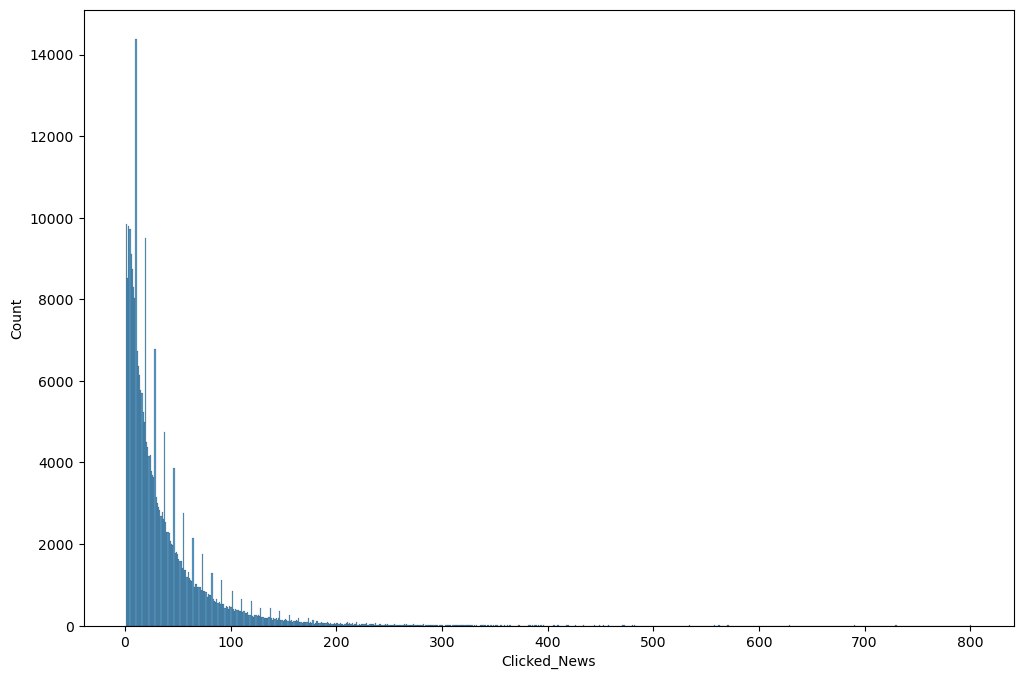

In [26]:
plt.figure(figsize=(12, 8))
sns.histplot(x=behaviors['Clicked_News'].apply(lambda x: len(x.split())))
plt.show()

### Target News Clicked Number

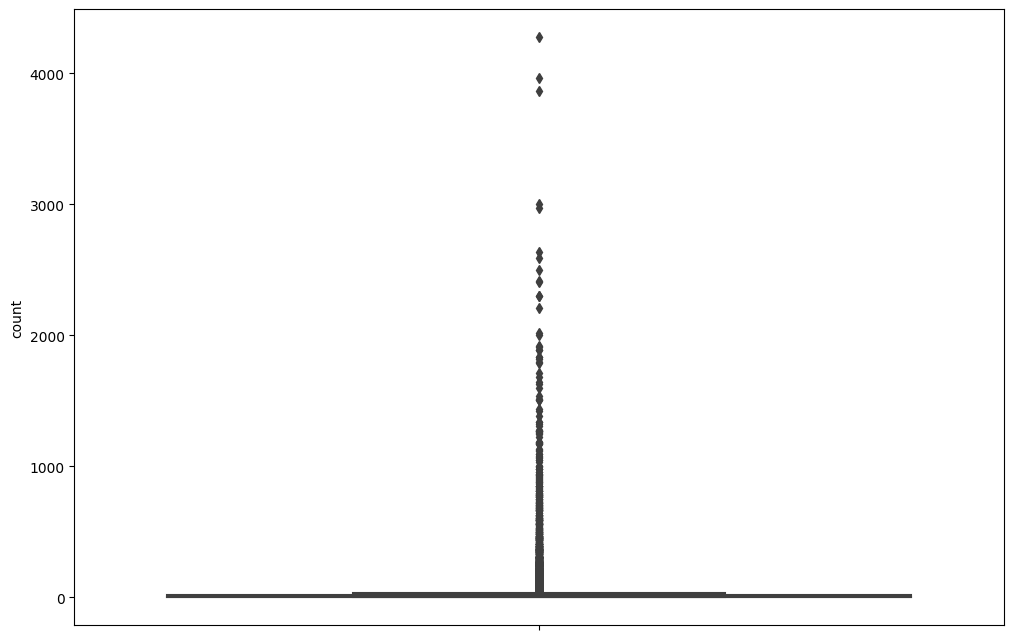

In [15]:
clicked = behaviors['Target_News_Clicked'].apply(lambda x: x.split())
indices = clicked.apply(lambda x: [i for i in range(len(x)) if x[i]=='1'])
x = behaviors['Target_News'].str.split()
target_clicked = []
for i in range(len(x)):
    for j in indices[i]:
        target_clicked.append(x[i][j])
target_clicked = pd.Series(target_clicked)

plt.figure(figsize=(12, 8))
sns.boxplot(y=target_clicked.value_counts())
plt.show()